# Assignment 2: EDA on Haberman Cancer Dataset
Name: Devendra Bharti <br/>
Email: kumardev0614@gmail.com

# 1: Import Dataset

In [1]:
#Haberman's survival dataset contains cases from a study that was conducted 
#between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients 
#who had undergone surgery for breast cancer.

#Attribute Information:
#Age of patient at the time of operation (numerical)
#Patient's year of operation (year - 1900, numerical)
#Number of positive axillary nodes detected (numerical)
#Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
hb = pd.read_csv('haberman.csv')

# 2: Number of points and features.

In [4]:
hb

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [5]:
hb.shape

(306, 4)

In [6]:
hb.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [7]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [8]:
hb.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### Observations:
1) We have data of 306 patients.
<br/>2) There is no single missing value in dataset.
<br/>3) This data is recorded between 1958 to 1970.
<br/>   So any value in year column from 58 to 70 means 1958 to 1970. EX 64 = 1964, 59 = 1959.
<br/>4) The age is between 30 to 83 Years.
<br/>5) Number of positive axillary nodes detected in patients are from 0 to 52 Lymph nodes.

# 3: Number of classes, data-points per class.

In [9]:
hb.status.value_counts()

1    225
2     81
Name: status, dtype: int64

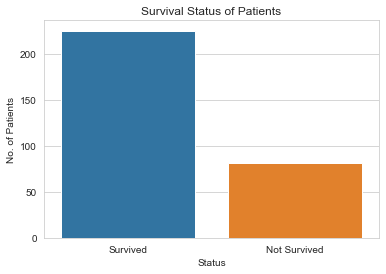

In [10]:
sns.set_style('whitegrid')

ax = sns.countplot(x='status', y=None, data=hb)

plt.title("Survival Status of Patients")
plt.xlabel('Status') 
plt.ylabel('No. of Patients')

ax.set(xticklabels=['Survived', 'Not Survived']) 
# ref: https://stackoverflow.com/questions/54167457/set-ticks-in-seaborn-countplot

plt.show()

#### Observations:
1) There is only one categorical variable "status" in our dataset.
<br/>1 means "Survied"
<br/>2 means "Not Survived"

2) So out of 306 patients, 225 survived 5 years or longer and 81 died within 5 years.<br/>
3) This dataset is not a balanced dataset.
Because there is a considerable difference between survived patients and non survived patients.

# 4: Our Objective
**We have to find That/Those feature(s) which can help us to build a Model which can classify whether a patient will survive or not.**

## 4.1: Our Approach
We will start with Univarite Analysis.
<br/>In univariate Analysis we will make distplot for each independent varirable in our dataset.
<br/>Distplot will help us to show the distribution of our variable, also it will plot the PDF which will show the probability distribution.
<br/>We will use hue='status'. So we will get 2 different distplot of same variable corresponding to status value.

**WHY Univariate analysis?**
<br/>It will help to filter out those variables which can be directly used in classification.

**Rule of thumb for analysing both distplots.**
<br>1) seperation between two plots shoud be maximum.
<br/>2) overlap of PDF curves should be minimum.

**Bivariate Analysis**
<br/>In this we will try to find combination of variables which can be useful for classification.

**In depth analysis of selected variables**
<br/>PDF, CDF, Boxplot, Mean, Median, std, IQR, MAD etc.

# 5: Univariate Analysis

#### 5.1: age

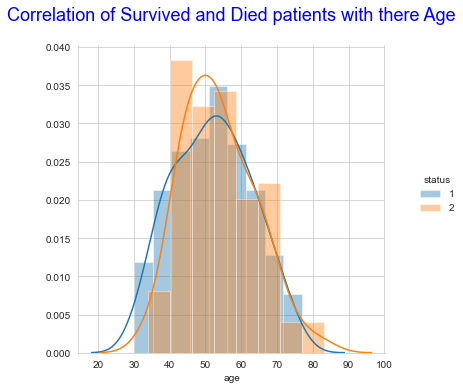

In [54]:
sns.FacetGrid(hb, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();

plt.title("Correlation of Survived and Died patients with there Age", fontsize=18, color="blue", pad=25)
plt.show();

Age will not be a good feature cause seperation is too poor and overlap is too much.

#### 5.2: year

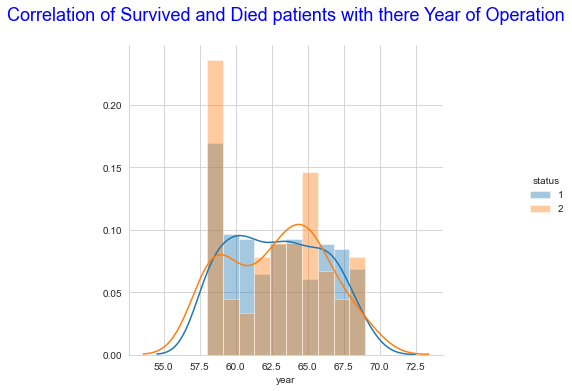

In [62]:
sns.FacetGrid(hb, hue="status", height=5) \
   .map(sns.distplot, "year", bins=10) \
   .add_legend();

plt.title("Correlation of Survived and Died patients with there Year of Operation", fontsize=18, color="blue", pad=25)
plt.show();

This is also not a usefull variable. Nearly no seperation. Plots are fully overlaping each other.

#### 5.3: nodes

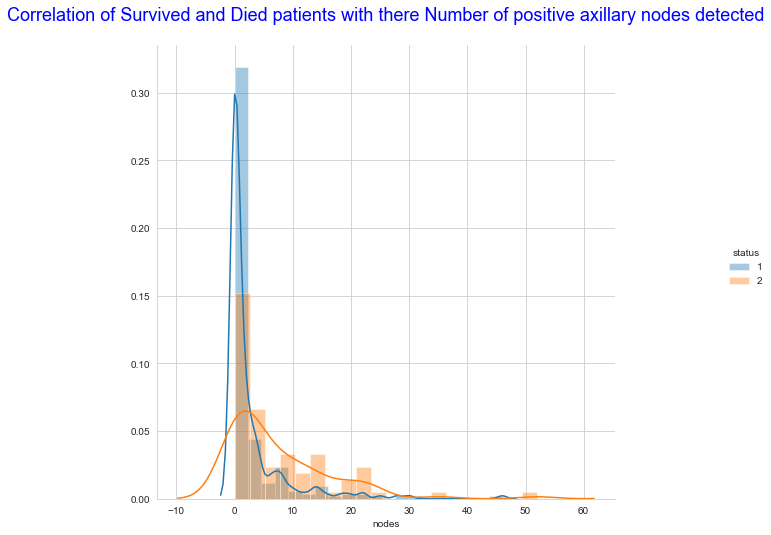

In [63]:
sns.FacetGrid(hb, hue="status", height=7).map(sns.distplot, "nodes", bins=20).add_legend();

plt.title("Correlation of Survived and Died patients with there Number of positive axillary nodes detected", fontsize=18, color="blue", pad=25)
plt.show()

Now nodes is a feature which can be usefull in classification.
<br/> Both PDF curves are seperated upto some extent.
<br/> overlap is lower than other two variables.

### Observations of Univariate Analysis.
"nodes" can be a good feature to build a classification model than "age" and "year"

# 6: Bivariate Analysis

#### 6.1 Pair Plot

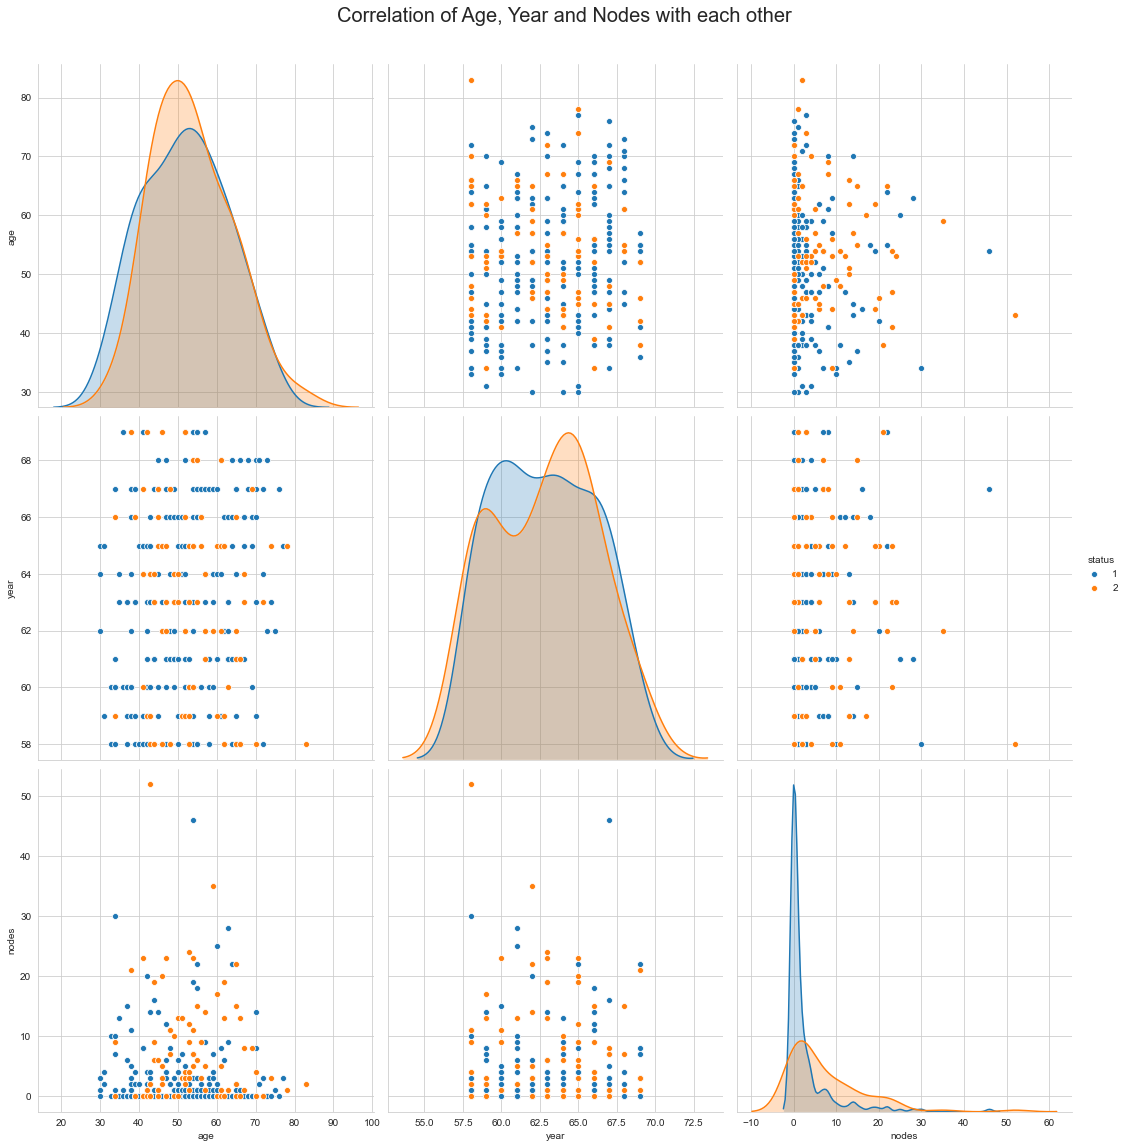

In [85]:
sns.set_style("whitegrid");
g = sns.pairplot(hb, hue="status", height=5)

g.fig.suptitle("Correlation of Age, Year and Nodes with each other", y=1.05, fontsize=20) # y= some height>1
plt.show()

### Observations of Bivariate Analysis
There is no combination of two features which can be helpful in classification.
<br/>Datapoints are ovrrlaping each other.

# 7: In depth analysis of selected variables
Because "nodes" is a good feature to be used in classification. So we will analyse this variable in different ways to see how efficent this variable is for classification.

In [15]:
surv = hb.loc[ hb.status == 1 ]  # Creating seperate dataframe of survived patients.
died = hb.loc[ hb.status == 2 ]  # Creating seperate dataframe of died patients.

#### 7.1 PDF

surv bin_edges [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.]

died bin_edges [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.]


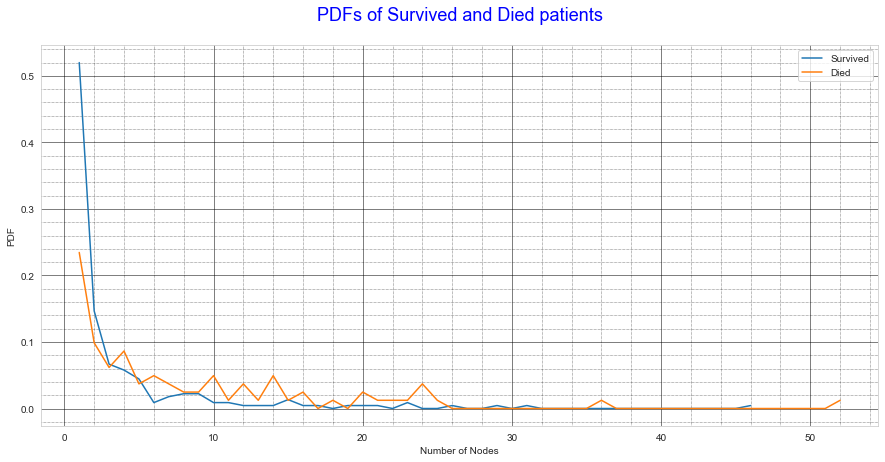

In [73]:
fig, ax = plt.subplots(figsize=(15,7))

# Survived
counts, bin_edges = np.histogram(surv['nodes'], bins=46, density = True)
pdf = counts/(sum(counts))

print('surv bin_edges', bin_edges)
plt.plot(bin_edges[1:],pdf, label='Survived')

print()

# Died
counts, bin_edges = np.histogram(died['nodes'], bins=52, density = True)
pdf = counts/(sum(counts))

print('died bin_edges', bin_edges)
plt.plot(bin_edges[1:],pdf, label='Died')

#---------------------------------------------------------------------------------------
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

ax.legend()
plt.title("PDFs of Survived and Died patients", fontsize=18, color="blue", pad=25)
plt.ylabel('PDF') 
plt.xlabel('Number of Nodes')
plt.show()

### Observations From PDF
1) For nodes <= 3 probability of survival is higher than non suvival.
<br/>2) from nodes = 3 to 5 we need much deeper analysis.
<br/> 3) After nodes > 5 probability of Non suvival is dominating the survival pdf curve.

### 7.2 CDF

surv bin_edges [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.]

died bin_edges [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.]


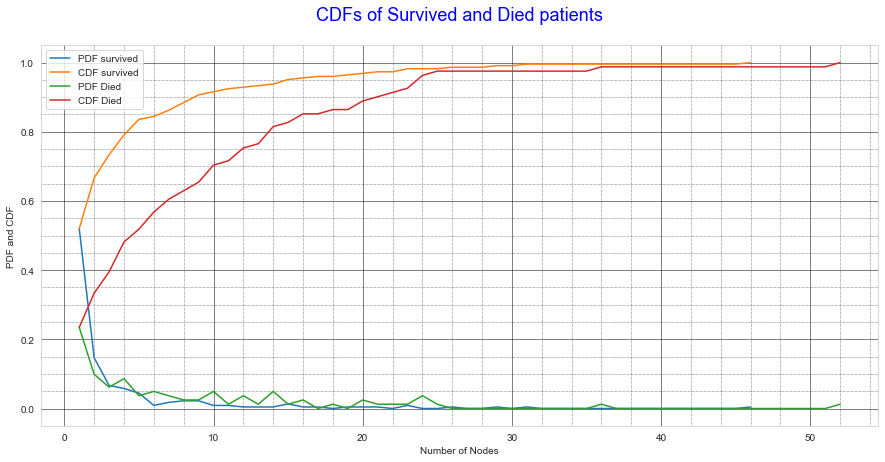

In [75]:
fig, ax = plt.subplots(figsize=(15,7))
#-----------------------------------------------------------------------------------------

# Survived
counts, bin_edges = np.histogram(surv['nodes'], bins=46, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

print('surv bin_edges', bin_edges)
plt.plot(bin_edges[1:], pdf, label="PDF survived")
plt.plot(bin_edges[1:], cdf, label="CDF survived")

print()

# Died
counts, bin_edges = np.histogram(died['nodes'], bins=52, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

print('died bin_edges', bin_edges)
plt.plot(bin_edges[1:], pdf, label="PDF Died")
plt.plot(bin_edges[1:], cdf, label="CDF Died")

#-----------------------------------------------------------------------------------------------------------
# Customize Grid Lines.

ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')


ax.legend()
plt.title("CDFs of Survived and Died patients", fontsize=18, color="blue", pad=25)
plt.ylabel('PDF and CDF') 
plt.xlabel('Number of Nodes')

plt.show();

### Observations from CDF
1) 80% of survived people are those who have number of affected lymph nodes from 0 to 4
<br/>2) 50% of died people are those who also have number of affected lymph nodes from 0 to 4
<br/>3) Survival rate is higher for nodes = 0 to 4 but death rate is also not neglectable.

# Mean and Std-dev

In [18]:
print("Means:")
print('Surv', np.mean(surv["nodes"]))
print('Died', np.mean(died["nodes"]))

print("\nStd-dev:")
print('Surv', np.std(surv["nodes"]))
print('Died', np.std(died["nodes"]))

Means:
Surv 2.7911111111111113
Died 7.45679012345679

Std-dev:
Surv 5.857258449412131
Died 9.128776076761632


#  Median, Percentiles, IQR, MAD

In [19]:
print("Median:")
print('Surv:', np.median(surv["nodes"]))
print('Died:', np.median(died["nodes"]))

print("\nIQR:")
print('Surv:', np.percentile(surv["nodes"], [25,50,75]))
print('died:', np.percentile(died["nodes"], [25,50,75]))

print("\nPercentiles with gap of 10%:")
print('Surv:', np.percentile(surv["nodes"], np.arange(0,101,10)))
print('died:', np.percentile(died["nodes"], np.arange(0,101,10)))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print('Surv:', robust.mad(surv["nodes"]))
print('died:', robust.mad(died["nodes"]))

Median:
Surv: 0.0
Died: 4.0

IQR:
Surv: [0. 0. 3.]
died: [ 1.  4. 11.]

Percentiles with gap of 10%:
Surv: [ 0.  0.  0.  0.  0.  0.  1.  2.  4.  8. 46.]
died: [ 0.  0.  0.  1.  3.  4.  6.  9. 13. 20. 52.]

Median Absolute Deviation
Surv: 0.0
died: 5.930408874022408


# Boxplot

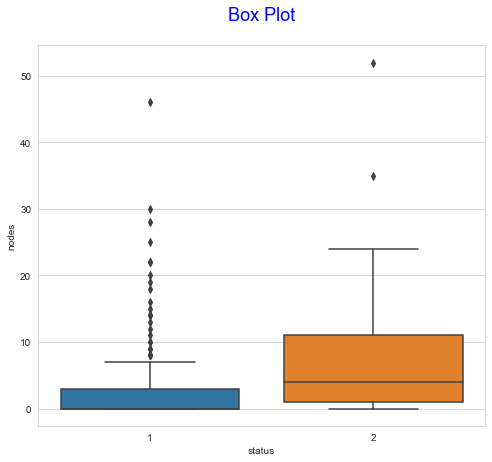

In [76]:
fig_dims = (8, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='status',y='nodes', ax=ax, data=hb)

plt.title("Box Plot", fontsize=18, color="blue", pad=25)
plt.show()

In [21]:
print(np.percentile(surv["nodes"],np.arange(0, 101, 25)))

[ 0.  0.  0.  3. 46.]


In [22]:
print(np.percentile(died["nodes"],np.arange(0, 101, 25)))

[ 0.  1.  4. 11. 52.]


# Voilin plot

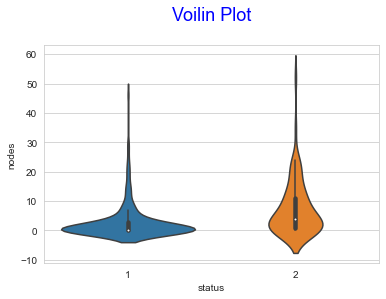

In [79]:
sns.violinplot(x="status", y="nodes", data=hb, size=8)

plt.title("Voilin Plot", fontsize=18, color="blue", pad=25)
plt.show()

# Conclusion

From distplot and PDF of nodes variable. We can treat 4 as a threshold value.
<br/>It means we can create a simple model like this

In [24]:
def Check_survival(nodes):
    if nodes <= 4:
        return 1
    else:
        return 2

But this model will have 20 - 25% error.

**nodes feature is not sufficient**
<br/>As we can see there are 20% people who have died with 0 affected lymph nodes.
<br/>Also there are people who have suvived with 10 to 14 affected nodes.

It means there are other resions/features which decides the survivel of patients.
<br/>We cannot build a classificaton model solely based on nodes value with less than 20% of error.